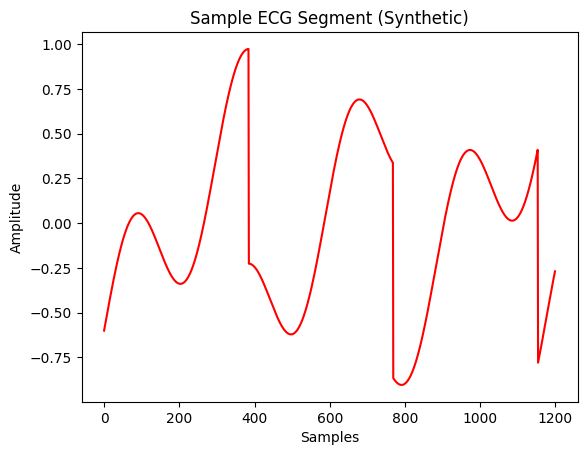

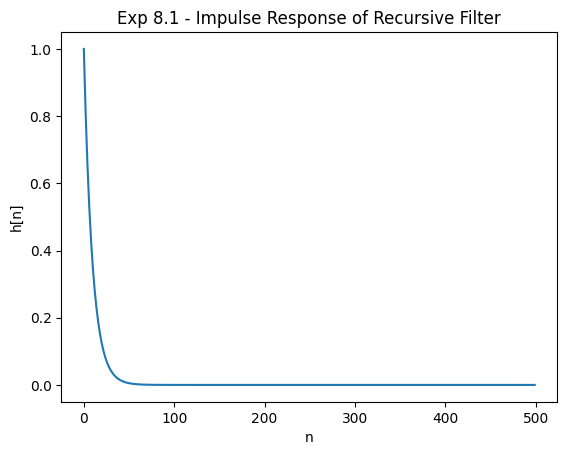

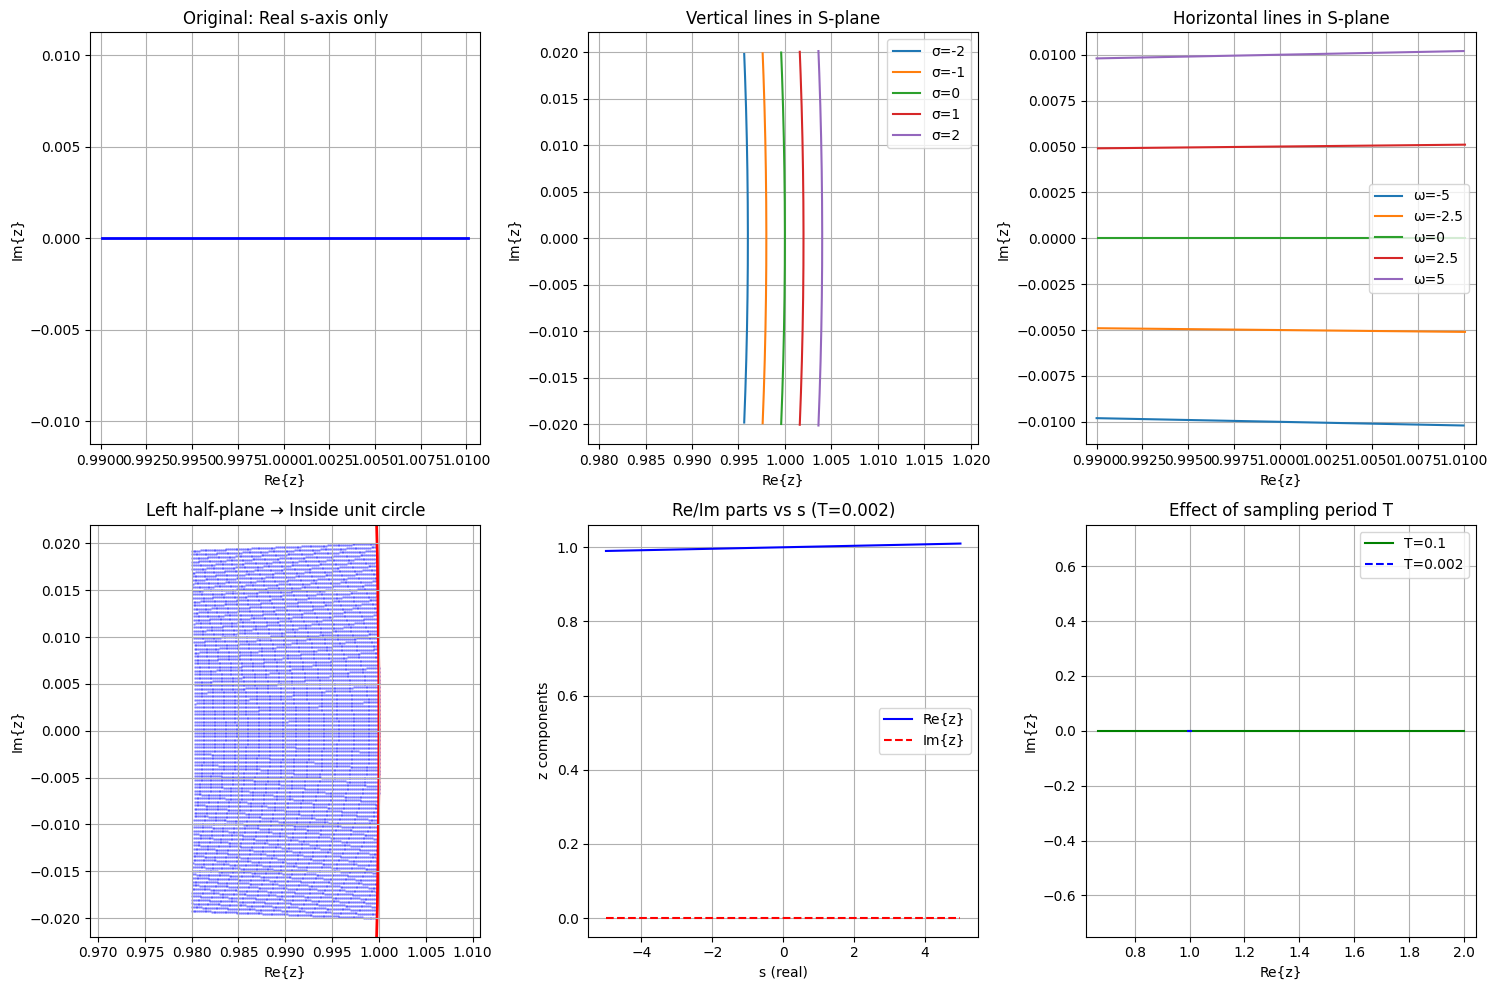

Mathematical Analysis:
Sampling period T = 0.002
For s = -5: z = 0.990099
For s = +5: z = 1.010101


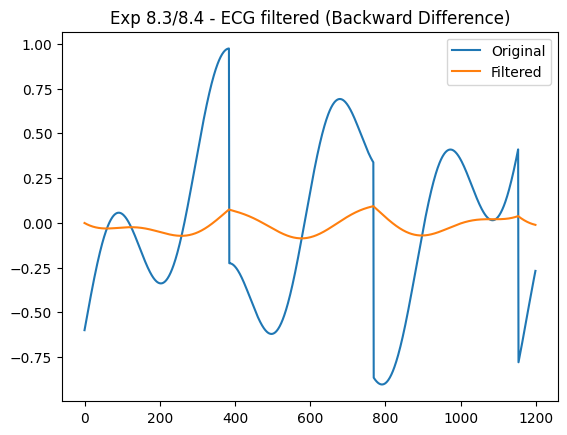

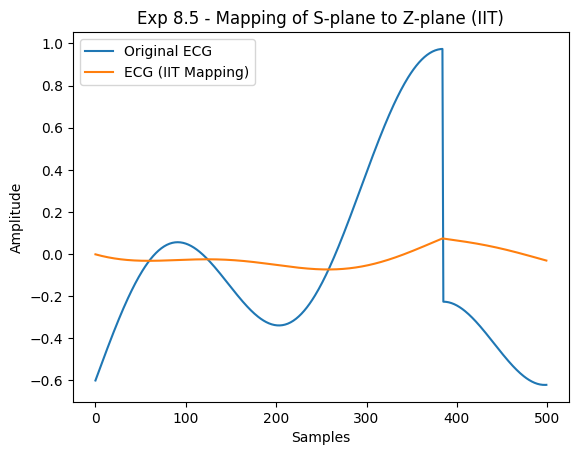

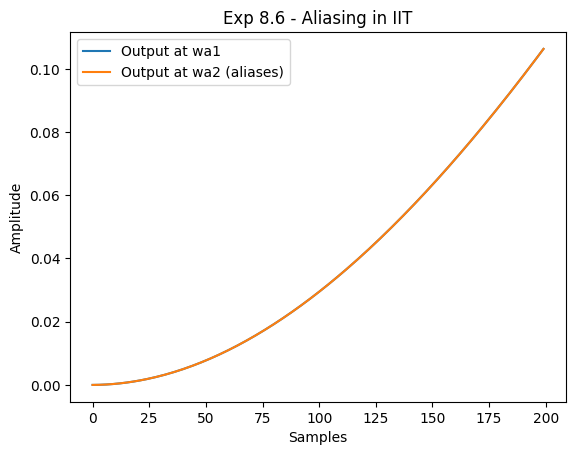

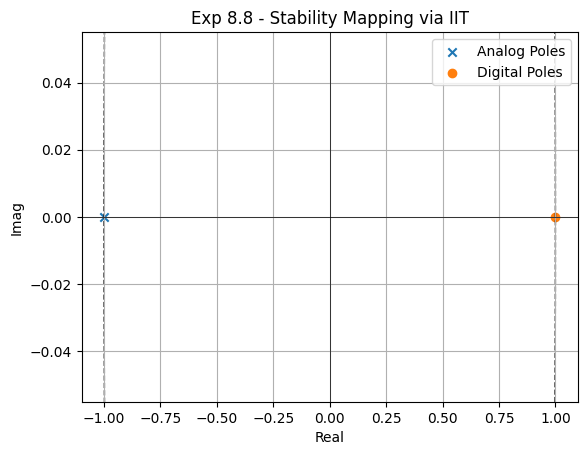

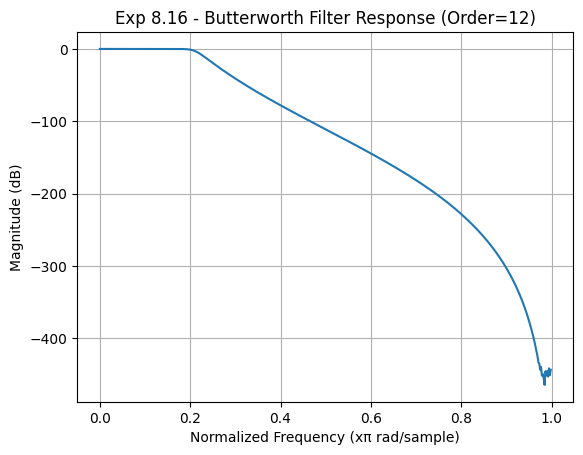

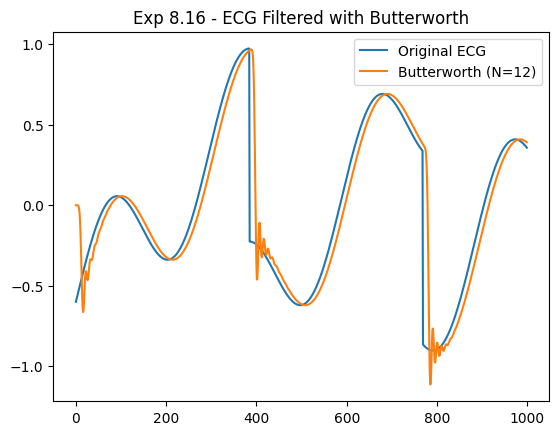

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal

fs = 500
t = np.linspace(0, 5, fs*5)
ecg_signal = 0.6 * signal.sawtooth(2 * np.pi * 1.3 * t) + 0.4 * np.sin(2 * np.pi * 1.7 * t)
plt.plot(ecg_signal[:1200], color='red')
plt.title("Sample ECG Segment (Synthetic)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

b = [1]
a = [1, -0.9]
impulse = signal.unit_impulse(500)
h = signal.lfilter(b, a, impulse)
plt.plot(h)
plt.title("Exp 8.1 - Impulse Response of Recursive Filter")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.show()

s = np.linspace(-5, 5, 200)
T = 1/fs
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
z = 1/(1 - s*T)
plt.plot(np.real(z), np.imag(z), 'b-', linewidth=2)
plt.title("Original: Real s-axis only")
plt.xlabel("Re{z}"); plt.ylabel("Im{z}")
plt.grid(True); plt.axis('equal')

plt.subplot(2, 3, 2)
sigma_values = [-2, -1, 0, 1, 2]  
omega = np.linspace(-10, 10, 200)  
for sigma in sigma_values:
    s_complex = sigma + 1j*omega
    z_complex = 1/(1 - s_complex*T)
    plt.plot(np.real(z_complex), np.imag(z_complex), label=f'σ={sigma}')
plt.title("Vertical lines in S-plane")
plt.xlabel("Re{z}"); plt.ylabel("Im{z}")
plt.legend(); plt.grid(True); plt.axis('equal')

plt.subplot(2, 3, 3)
omega_values = [-5, -2.5, 0, 2.5, 5]
sigma = np.linspace(-5, 5, 200)  
for omega in omega_values:
    s_complex = sigma + 1j*omega
    z_complex = 1/(1 - s_complex*T)
    plt.plot(np.real(z_complex), np.imag(z_complex), label=f'ω={omega}')
plt.title("Horizontal lines in S-plane")
plt.xlabel("Re{z}"); plt.ylabel("Im{z}")
plt.legend(); plt.grid(True); plt.axis('equal')

plt.subplot(2, 3, 4)
sigma = np.linspace(-10, 0, 100) 
omega = np.linspace(-10, 10, 100)
sigma_grid, omega_grid = np.meshgrid(sigma, omega)
s_grid = sigma_grid + 1j*omega_grid
z_grid = 1/(1 - s_grid*T)
plt.scatter(np.real(z_grid.flatten()), np.imag(z_grid.flatten()), c='blue', alpha=0.3, s=1)
circle = plt.Circle((0, 0), 1, fill=False, color='red', linewidth=2)
plt.gca().add_artist(circle)
plt.title("Left half-plane → Inside unit circle")
plt.xlabel("Re{z}"); plt.ylabel("Im{z}")
plt.grid(True); plt.axis('equal')

plt.subplot(2, 3, 5)
s_real = np.linspace(-5, 5, 200)
z_real = 1/(1 - s_real*T)
plt.plot(s_real, np.real(z_real), 'b-', label='Re{z}')
plt.plot(s_real, np.imag(z_real), 'r--', label='Im{z}')
plt.title(f"Re/Im parts vs s (T={T})")
plt.xlabel("s (real)"); plt.ylabel("z components")
plt.legend(); plt.grid(True)

plt.subplot(2, 3, 6)
T_large = 0.1
z_large_T = 1/(1 - s*T_large)
plt.plot(np.real(z_large_T), np.imag(z_large_T), 'g-', label=f'T={T_large}')
plt.plot(np.real(z), np.imag(z), 'b--', label=f'T={T}')
plt.title("Effect of sampling period T")
plt.xlabel("Re{z}"); plt.ylabel("Im{z}")
plt.legend(); plt.grid(True); plt.axis('equal')

plt.tight_layout(); plt.show()

print("Mathematical Analysis:")
print(f"Sampling period T = {T}")
print(f"For s = -5: z = {1/(1-(-5)*T):.6f}")
print(f"For s = +5: z = {1/(1-(5)*T):.6f}")

num = [1]; den = [1, 1]
sysd = signal.cont2discrete((num, den), dt=1/fs, method='backward_diff')
b, a, dt = sysd[0].flatten(), sysd[1].flatten(), sysd[2]
filtered_ecg = signal.lfilter(b, a, ecg_signal)
plt.plot(ecg_signal[:1200], label="Original")
plt.plot(filtered_ecg[:1200], label="Filtered")
plt.legend(); plt.title("Exp 8.3/8.4 - ECG filtered (Backward Difference)")
plt.show()

sysd_iit = signal.cont2discrete((num, den), dt=T, method='impulse')
b, a = sysd_iit[0].flatten(), sysd_iit[1].flatten()
filtered_ecg_85 = signal.lfilter(b, a, ecg_signal)
plt.plot(ecg_signal[:500], label="Original ECG")
plt.plot(filtered_ecg_85[:500], label="ECG (IIT Mapping)")
plt.title("Exp 8.5 - Mapping of S-plane to Z-plane (IIT)")
plt.xlabel("Samples"); plt.ylabel("Amplitude")
plt.legend(); plt.show()

wa1 = np.pi * 0.5
wa2 = wa1 + 2*np.pi/T
n = np.arange(1000)
sig1 = np.sin(wa1*n*T)
sig2 = np.sin(wa2*n*T)
out1 = signal.lfilter(b, a, sig1)
out2 = signal.lfilter(b, a, sig2)
plt.plot(out1[:200], label="Output at wa1")
plt.plot(out2[:200], label="Output at wa2 (aliases)")
plt.title("Exp 8.6 - Aliasing in IIT")
plt.xlabel("Samples"); plt.ylabel("Amplitude")
plt.legend(); plt.show()

poles_analog = np.roots(den)
poles_digital = np.exp(poles_analog * T)
plt.scatter(np.real(poles_analog), np.imag(poles_analog), marker='x', label="Analog Poles")
plt.scatter(np.real(poles_digital), np.imag(poles_digital), marker='o', label="Digital Poles")
circle = plt.Circle((0, 0), 1, fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.title("Exp 8.8 - Stability Mapping via IIT")
plt.xlabel("Real"); plt.ylabel("Imag")
plt.legend(); plt.grid(); plt.show()

wp = 0.2 * np.pi
ws = 0.3 * np.pi
rp = 1
rs = 40
N, Wn = signal.buttord(wp/np.pi, ws/np.pi, rp, rs)
b, a = signal.butter(N, Wn, btype='low')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20*np.log10(abs(h)))
plt.title(f"Exp 8.16 - Butterworth Filter Response (Order={N})")
plt.xlabel("Normalized Frequency (xπ rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid(); plt.show()

filtered_ecg_butter = signal.lfilter(b, a, ecg_signal)
plt.plot(ecg_signal[:1000], label="Original ECG")
plt.plot(filtered_ecg_butter[:1000], label=f"Butterworth (N={N})")
plt.legend(); plt.title("Exp 8.16 - ECG Filtered with Butterworth")
plt.show()


In [ ]:
# Theoretical Analysis (Prelab Questions Answers)

# 1. In a recursive filter, the present output depends on both the inputs and previously calculated outputs.

# 2. The IIR filter is a recursive filter. The present output of the IIR filter depends on input and past output. Hence, the IIR filter is a recursive filter.

# 3. Ripple is the fluctuations in the passband or stopband of the filter’s frequency response. It is expressed in decibels.

# 4. Based on the ripples in the frequency response of the IIR filter, the filters are classified as: 
#       (a) Butterworth filter 
#       (b) Chebyshev filter (Type I) 
#       (c) Inverse Chebyshev filter (Type II) 
#       (d) Elliptic filter 

# 5. The Butterworth filter’s magnitude response is monotonically decreased at all  frequencies, and also, there are no local maxima or minima in both the passband 
#    and stopband. Hence, it is also called flat-flat filter. 

# 6. Mapping is a technique used in IIR filter design for converting analogue filters into digital filters. The different types of mapping techniques are: 
#       (a) Backward difference method 
#       (b) Impulse invariant technique (IIT) 
#       (c) Bilinear transformation technique (BLT) 
#       (d) Matched Z-transform technique 

# 7. While converting an analogue filter into an equivalent digital filter, it is necessary that a stable analogue filter should be mapped to a stable digital filter. 
#    The points of the analogue filter in the left half S-plane must be mapped inside the unit circle in the Z-plane to preserve the stability of the filter. Therefore, 
#    all mapping techniques must preserve the stability of the filter. 

# 8. The steps involved in obtaining the transfer function of a digital filter 
#    using the impulse invariant technique are summarized below: 
#       (a) Obtain the transfer function of an analogue filter H(s), which has to be 
#           converted into an equivalent digital filter H(z). 
#       (b) From the analogue transfer function H(s), get the impulse response h(t) 
#           using the inverse Laplace transform. 
#       (c) Apply the sampling process on impulse response h(t) to get h[nT]. 
#       (d) Take the Z-transform of the sampled impulse response h[nT] to get the 
#           equivalent transfer function H(z). 
# 9. The following steps are involved in the IIR filter design: 
#       Step 1: Convert the digital filter specifications into an equivalent analogue 
#               filter specification. 
#       Step 2: Convert the analogue filter specifications to normalized lowpass 
#               prototype specifications. 
#       Step 3: Design a normalized lowpass prototype filter using any one of the 
#               analogue filters: 
#                   (a) Butterworth filter 
#                   (b) Chebyshev Type I filter 
#                   (c) Chebyshev Type II filter 
#                   (d) Elliptic filter 
#       Step 4: Use analogue transformation techniques to convert the normalized 
#               lowpass prototype filter into the desired analogue filter. 
#       Step 5: Use a mapping technique to convert the desired analogue filter into a 
#               desired digital filter. 

# 12. Classification of IIR Filters (based on ripple and filter characteristics): 
#       ---------------------------------------------------------------
#       S. No. | Type of IIR Filter     | Ripple in Passband | Ripple in Stopband 
#              | Transition Width       | Order of Filter
#       ---------------------------------------------------------------
#       1      | Butterworth Filter     | NO                 | NO 
#              | Widest                 | Highest 
#       ---------------------------------------------------------------
#       2      | Chebyshev Filter       | YES                | NO 
#              | Narrower               | Lower 
#       ---------------------------------------------------------------
#       3      | Inverse Chebyshev      | NO                 | YES 
#              | Narrower               | Lower 
#       ---------------------------------------------------------------
#       4      | Elliptic Filter        | YES                | YES 
#              | Narrowest              | Lowest 
#       ---------------------------------------------------------------
# 13. The following steps are involved in the IIR filter design: 
#       Step 1: Convert the digital filter specifications into an equivalent analogue 
#               filter specification. 
#       Step 2: Convert the analogue filter specifications to normalized lowpass 
#               prototype specifications. 
#       Step 3: Design a normalized lowpass prototype filter using any one of the 
#               analogue filters: 
#                   (a) Butterworth filter 
#                   (b) Chebyshev Type I filter 
#                   (c) Chebyshev Type II filter 
#                   (d) Elliptic filter 
#       Step 4: Use analogue transformation techniques to convert the normalized 
#               lowpass prototype filter into the desired analogue filter. 
#       Step 5: Use a mapping technique to convert the desired analogue filter into a 
#               desired digital filter. 
